In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime

In [2]:
OptInfo = {}
OptInfo['Bounds Longitude']     = [230,360]
OptInfo['Bounds Latitude']      = [-80,-40]
OptInfo['Grid Spacing (dx,dy)'] = [5,2.5]
OptInfo['Start Time']           = '2017-05-01'
OptInfo['End Time']             = '2017-06-01'
OptInfo['WayPoints']            = pd.read_csv('../../resources/WayPoints_TestExample2.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

In [3]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(OptInfo)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(0)

In [4]:
TT = TravelTime(cellGrid)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = Falklands ===
=== Processing Waypoint = SouthGeorgia ===


(-60.0, -50.0)

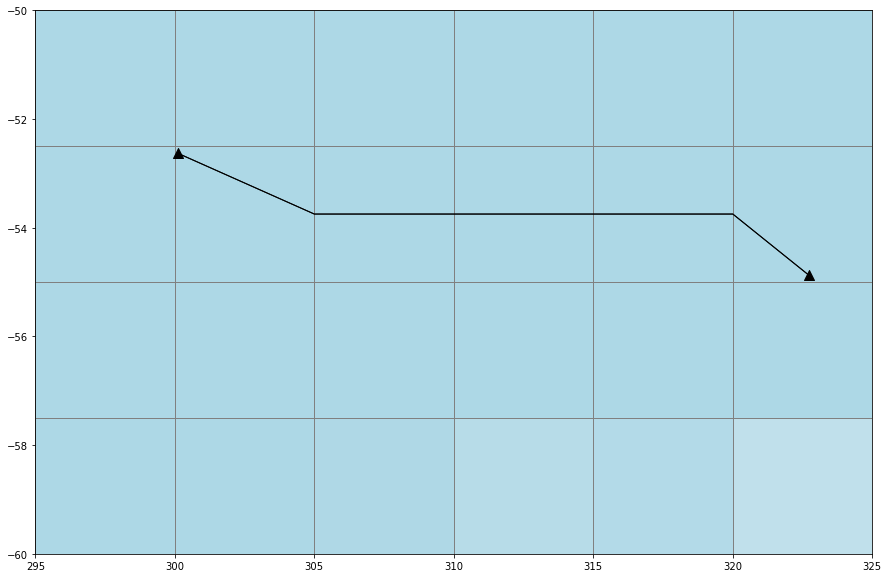

In [5]:
#Plotting the python paths
ax = TT.PlotPaths()

ax.set_xlim([295,325])
ax.set_ylim([-60,-50])

In [6]:
TT.PathSmoothing(maxiter=250)

 PATH: Falklands -> SouthGeorgia 
Sp=(300.12,-52.63472222222222);Cp=(305.0,-53.75);Np=(310.0,-53.75)
Box1=(-53.19236111111111,302.56);Box2=(-53.75,307.5)
Sp=(305.0,-53.36290955183726);Cp=(310.0,-53.75);Np=(315.0,-53.75)
Box1=(-53.55645477591863,307.5);Box2=(-53.75,312.5)
Sp=(310.0,-53.73372658553422);Cp=(315.0,-53.75);Np=(320.0,-53.75)
Box1=(-53.74186329276711,312.5);Box2=(-53.75,317.5)
Sp=(315.0,-53.93423784127149);Cp=(320.0,-53.75);Np=(322.73583333333335,-54.87916666666667)
Box1=(-53.84211892063574,317.5);Box2=(-54.31458333333333,321.3679166666667)
Sp=(300.12,-52.63472222222222);Cp=(305.0,-53.36290955183726);Np=(310.0,-53.73372658553422)
Box1=(-52.99881588702974,302.56);Box2=(-53.548318068685745,307.5)
Sp=(305.0,-53.35452131540819);Cp=(310.0,-53.73372658553422);Np=(315.0,-53.93423784127149)
Box1=(-53.5441239504712,307.5);Box2=(-53.833982213402855,312.5)
Sp=(310.0,-53.823447664921815);Cp=(315.0,-53.93423784127149);Np=(320.0,-54.650765388587125)
Box1=(-53.87884275309665,312.5);Box2=(-5

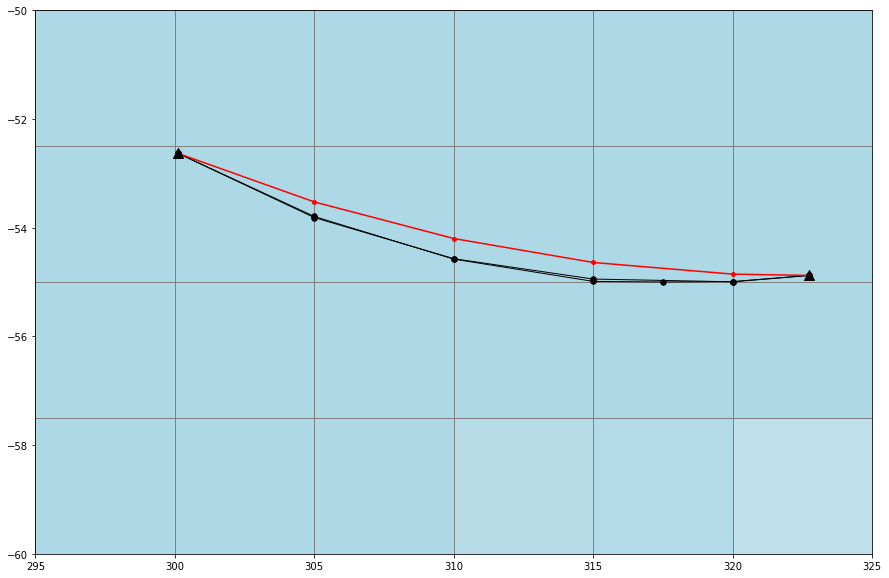

In [7]:
#Plotting the python paths
ax = TT.PlotPaths(routepoints=True)

ax.set_xlim([295,325])
ax.set_ylim([-60,-50])


GT = pd.read_csv('../../resources/GroundTruth_FalklandsSouthGeorgia_Smooth.csv')
GT['Long'] = GT['Long']+360
ax.plot(GT['Long'],GT['Lat'],'r')
ax.scatter(GT['Long'],GT['Lat'],15,'r')

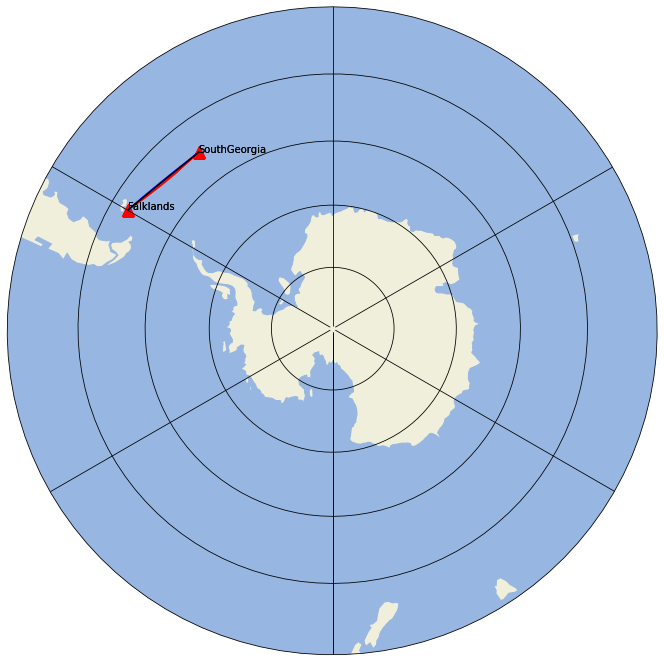

In [8]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature

PATH1 =  TT.Paths[0]['Path']['FullPath']

fig = plt.figure(figsize=[10, 10])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)
# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines(color='k')


for ii in range(len(TT.Paths)):
    PATH1 =  TT.Paths[ii]['Path']['FullPath']
    ax1.plot(PATH1[:,0]-360,PATH1[:,1],'r',transform=ccrs.PlateCarree())
    for ii, wpt in OptInfo['WayPoints'].iterrows():
        ax1.scatter(wpt['Long']-360,wpt['Lat'],150,marker='^',color='r',transform=ccrs.PlateCarree())
        ax1.text(wpt['Long']-360,wpt['Lat'],wpt['Name'],transform=ccrs.PlateCarree())

ax1.plot(GT['Long'],GT['Lat'],'b',transform=ccrs.PlateCarree())

ax1.plot([PATH1[0,0],PATH1[-1,0]],[PATH1[0,1],PATH1[-1,1]],'k',transform=ccrs.Geodetic())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)
